In [91]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Load Netflix Dataset
df = pd.read_csv("netflix_titles.csv")

In [14]:
# Dataset Overview
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
#Date format conversion
df['date_added'] = pd.to_datetime(df['date_added'])

In [16]:
#Check will we have have NaN(Data Quality Check)
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
## Replace Missing Values(NaN values)
columns_to_fill = ['director', 'cast', 'country', 'rating', 'duration']
df[columns_to_fill] = df[columns_to_fill].fillna('No Data')

In [18]:
#Verify Data Cleaning
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


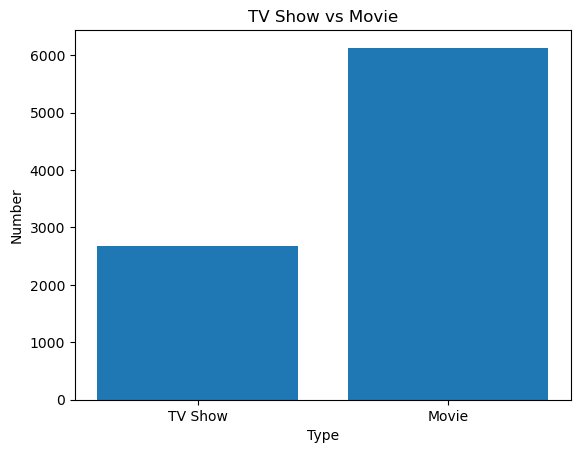

<Figure size 640x480 with 0 Axes>

In [87]:
#Content Distribution Analysis
a =  len(df[df['type'] == 'TV Show']) 
b = len(df[df['type'] == 'Movie'])
types = ['TV Show', 'Movie']
count = [a,b]
plt.bar(types,count)
plt.title('TV Show vs Movie')
plt.xlabel('Type')
plt.ylabel('Number')
plt.show()
plt.savefig("TV Show vs Movie.png")

In [20]:
# Extract Year Information
df['Year_added'] = df['date_added'].dt.year

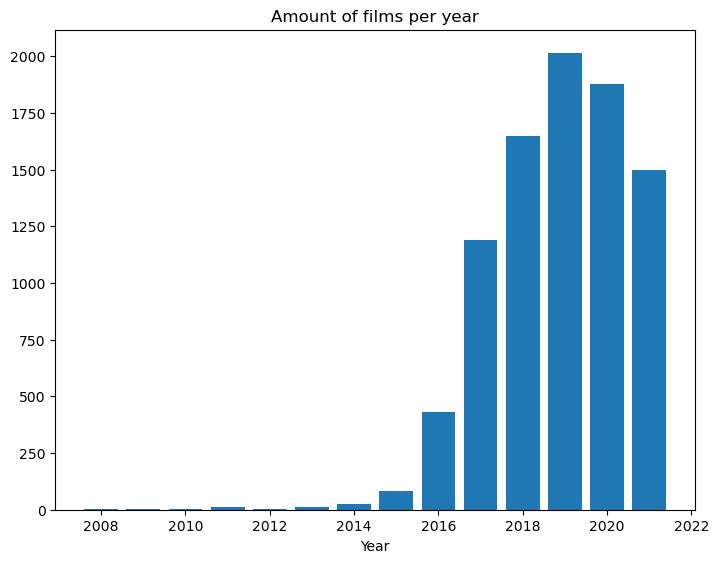

In [88]:
# Yearly Content Distribution Visualization
b = df['Year_added'].value_counts().sort_index()
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.bar(b.index,b)
ax1.set_xlabel('Year')
ax1.set_label('Amount')
ax1.set_title('Amount of films per year')
plt.savefig("Content by Year.png")

In [84]:
# Top 10 Countries by Content Volume

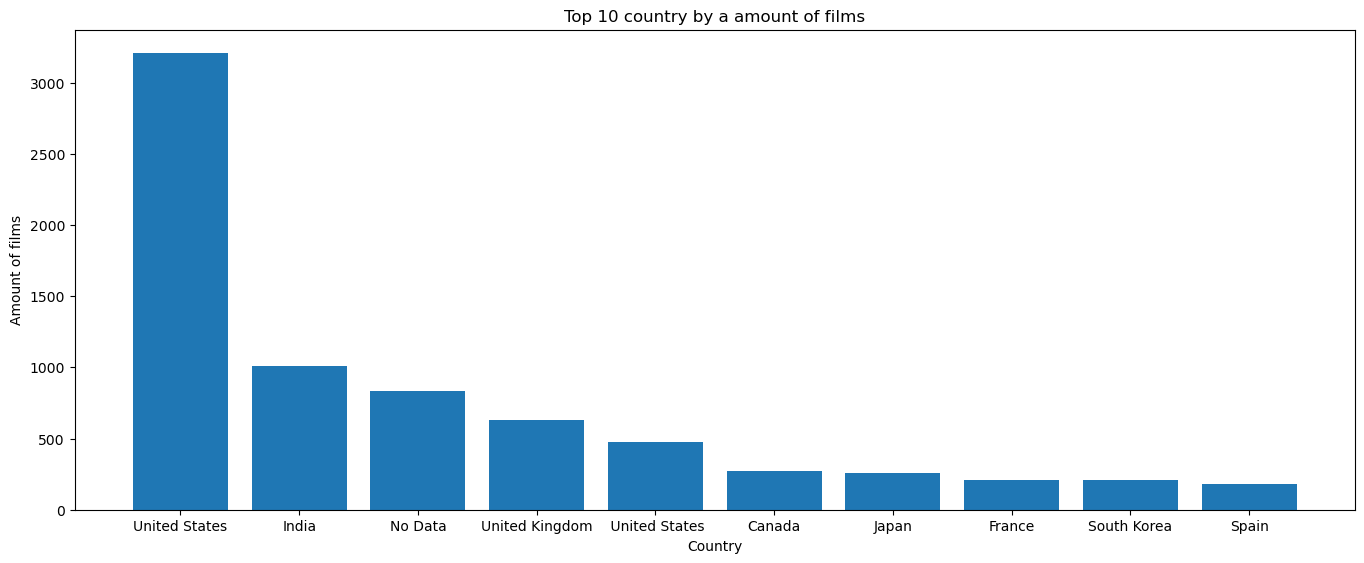

In [89]:
# Data Processing
a = df['country'].str.split(',').explode().value_counts()
top_10 = a.head(10)
fig = plt.figure()
axe = fig.add_axes([0,0,2,1])
axe.bar(top_10.index,top_10)
axe.set_xlabel('Country')
axe.set_ylabel('Amount of films')
axe.set_title('Top 10 country by a amount of films')
plt.savefig("Top 10 countries.png")

In [ ]:
# Top 10 Genres Analysis

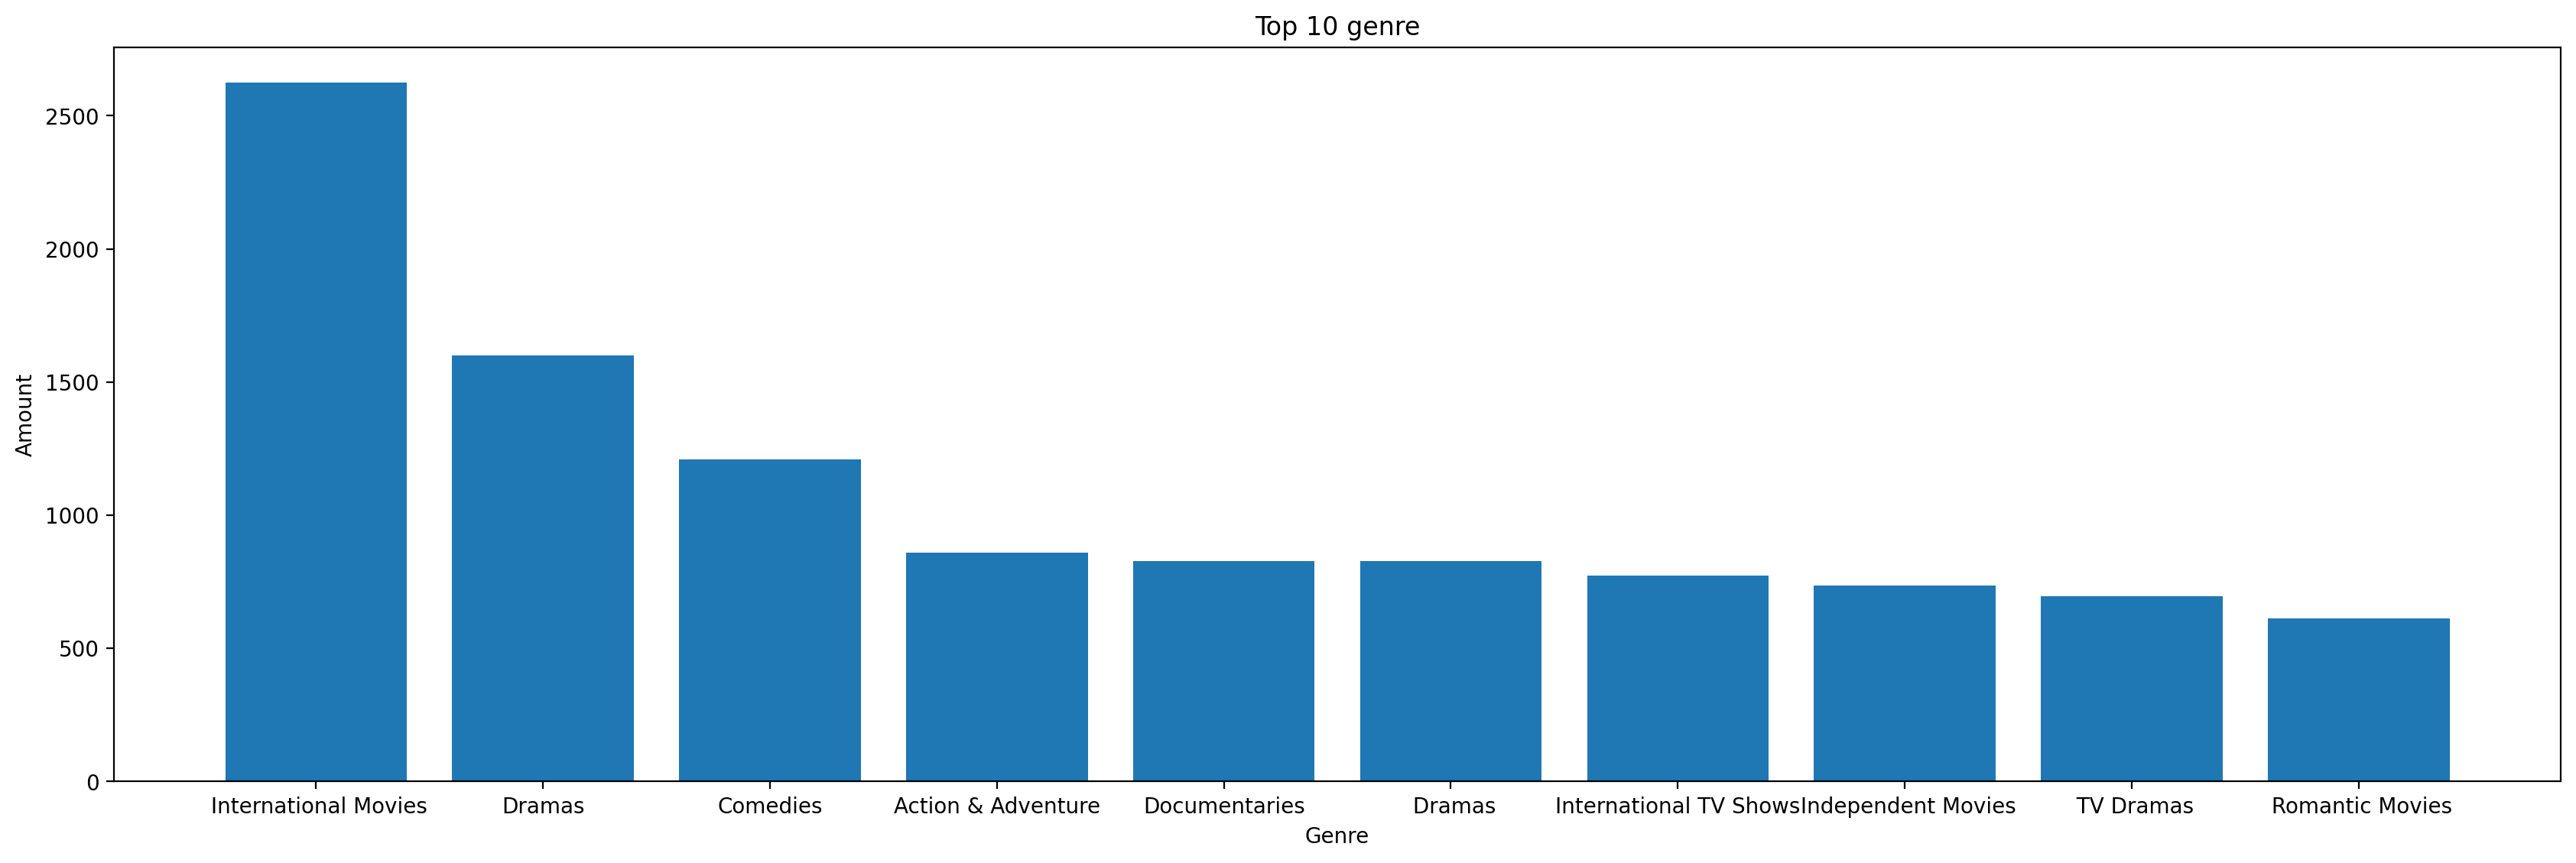

In [90]:
# Genre Data Processing 
a = df['listed_in'].str.split(',').explode().value_counts()
top_10 = a.head(10)
fig = plt.figure(dpi=200)
axe = fig.add_axes([0,0,2.5,1])
axe.bar(top_10.index,top_10)
axe.set_xlabel('Genre')
axe.set_ylabel('Amount')
axe.set_title('Top 10 genre')
plt.savefig("Top 10 genres.png")